In [304]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [305]:
data=pd.read_excel("D:\Studies\SD03Q06\Social_Network_Ads.xlsx")

In [306]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User ID           400 non-null    int64 
 1   Gender            400 non-null    object
 2   Age               400 non-null    int64 
 3   EstimatedSalary   400 non-null    int64 
 4   Purchased         400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


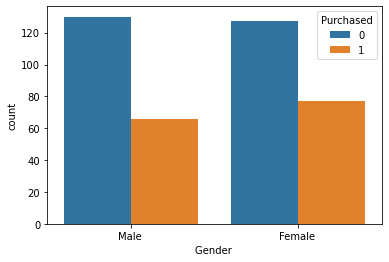

In [307]:
sns.countplot(x='Gender ',hue='Purchased',data=data)

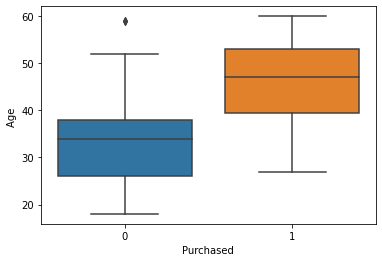

In [308]:
sns.boxplot(x='Purchased',y='Age ',data=data)

In [309]:
data['Age '].describe()

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age , dtype: float64

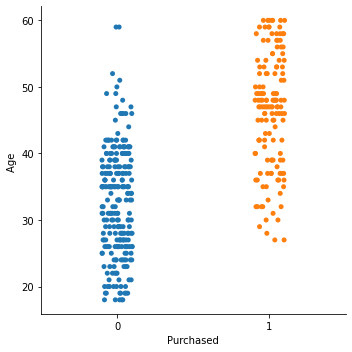

In [310]:
sns.catplot(x='Purchased',y='Age ',data=data)

In [311]:
def categorize(a):
    if a<30:
        return "Young"
    elif a>=30 and a<=50:
        return "Middle"
    elif a>50:
        return "Old"

In [312]:
data['Age_category']=data['Age '].apply(lambda x: categorize(x))
data['Age_category'].value_counts()

Middle    251
Young     100
Old        49
Name: Age_category, dtype: int64

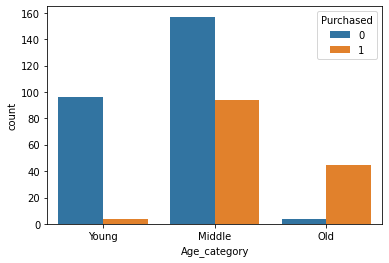

In [313]:
sns.countplot(x='Age_category',hue='Purchased',data=data)

In [314]:
data['EstimatedSalary '].describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary , dtype: float64

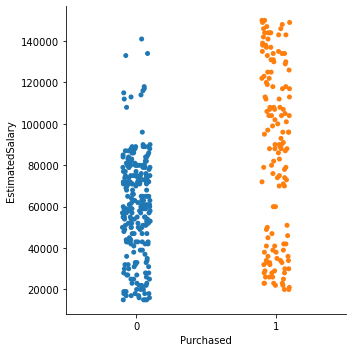

In [315]:
sns.catplot(x='Purchased',y='EstimatedSalary ',data=data)

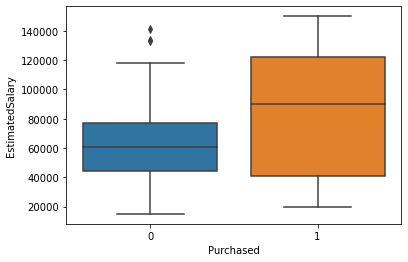

In [316]:
sns.boxplot(x='Purchased',y='EstimatedSalary ',data=data)

In [317]:
def cate_sal(a):
    if a<45000:
        return " < 45000"
    elif a>=45000 and a<=70000:
        return " > 45000 and < 70000"
    elif a> 70000:
        return " > 70000"

In [318]:
data['Salary_category']=data['EstimatedSalary '].apply(lambda x: cate_sal(x))

In [319]:
data['Salary_category'].value_counts()

 > 70000                197
 < 45000                106
 > 45000 and < 70000     97
Name: Salary_category, dtype: int64

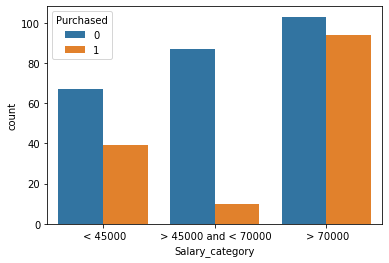

In [320]:
sns.countplot(x='Salary_category',hue='Purchased',data=data)

In [321]:

data['Gender ']=data['Gender '].apply(lambda x: 0 if x=="Female " else 1)

In [322]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age_category,Salary_category
0,15624510,1,19,19000,0,Young,< 45000
1,15810944,1,35,20000,0,Middle,< 45000
2,15668575,0,26,43000,0,Young,< 45000
3,15603246,0,27,57000,0,Young,> 45000 and < 70000
4,15804002,1,19,76000,0,Young,> 70000


In [323]:
data.drop(['User ID '],axis=1,inplace=True)

In [324]:
X= data.iloc[:, [0,1,2]].values  
Y= data["Purchased"].values

In [325]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [326]:
# Splitting dataset into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0 ) 


In [327]:
from scipy.stats import mode
class K_Nearest_Neighbors_Classifier() :  
      
    def __init__( self, K ) : 
          
        self.K = K 
          
    # Function to store training set 
          
    def fit( self, X_train, Y_train ) : 
          
        self.X_train = X_train 
          
        self.Y_train = Y_train 
          
        # no_of_training_examples, no_of_features 
          
        self.m, self.n = X_train.shape 
      
    # Function for prediction 
          
    def predict( self, X_test ) : 
          
        self.X_test = X_test 
          
        # no_of_test_examples, no_of_features 
          
        self.m_test, self.n = X_test.shape 
          
        # initialize Y_predict 
          
        Y_predict = np.zeros( self.m_test ) 
          
        for i in range( self.m_test ) : 
              
            x = self.X_test[i] 
              
            # find the K nearest neighbors from current test example 
              
            neighbors = np.zeros( self.K ) 
              
            neighbors = self.find_neighbors( x ) 
              
            # most frequent class in K neighbors 
              
            Y_predict[i] =mode( neighbors )[0][0]     
              
        return Y_predict 
      
    # Function to find the K nearest neighbors to current test example 
            
    def find_neighbors( self, x ) : 
          
        # calculate all the euclidean distances between current  
        # test example x and training set X_train 
          
        euclidean_distances = np.zeros( self.m ) 
          
        for i in range( self.m ) : 
              
            d = self.euclidean( x, self.X_train[i] ) 
              
            euclidean_distances[i] = d 
          
        # sort Y_train according to euclidean_distance_array and  
        # store into Y_train_sorted 
          
        inds = euclidean_distances.argsort() 
          
        Y_train_sorted = self.Y_train[inds] 
          
        return Y_train_sorted[:self.K] 
      
    # Function to calculate euclidean distance 
              
    def euclidean( self, x, x_train ) : 
          
        return np.sqrt( np.sum( np.square( x - x_train ) ) ) 
  
# Driver code 
  


In [328]:

    # Importing dataset 
    # Model training 
model_knn = K_Nearest_Neighbors_Classifier( K = 3 )       
model_knn.fit( X_train, Y_train ) 
#model1 = KNeighborsClassifier( n_neighbors = 3 ) 
#model1.fit( X_train, Y_train ) 
      


In [329]:
    # Prediction on test set 
Y_pred_knn = model_knn.predict( X_test ) 


In [330]:

#Y_pred1 = model1.predict( X_test ) 
      
    # measure performance 
      
correctly_classified = 0
correctly_classified1 = 0
      
    # counter 
count = 0
for count in range(np.size(Y_pred_knn)):
    if Y_test[count] == Y_pred_knn[count] :
        correctly_classified = correctly_classified + 1
    count = count + 1
print( "Accuracy on test set by our model       :  ", (correctly_classified / count ) * 100 ) 
#print( "Accuracy on test set by sklearn model   :  ", (correctly_classified1 / count ) * 100 ) 
      

Accuracy on test set by our model       :   92.5


In [331]:
from sklearn.neighbors import KNeighborsClassifier

In [332]:
knn1=K_Nearest_Neighbors_Classifier(3)

In [333]:
knn1.fit( X_train, Y_train ) 

In [334]:
 y1p=knn1.predict(X_test)


In [335]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y1p))

Accuracy: 0.925
